In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [49]:
df = pd.read_csv('pandas.tsv', delimiter='\t', na_filter=False,
                 dtype={'Object':'string', 'Key':'string', 'Type':'string', 
                        'SinceVersion':'string', 'DeprecatedIn':'string', 'Required':'string', 
                        'IndirectReference':'string', 'Inheritable':'string', 
                        'DefaultValue':'string', 'PossibleValues':'string', 
                        'SpecialCase':'string', 'Link':'string', 'Note':'string'})

In [50]:
df.head()

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
0,3DActivation,A,name,1.6,,FALSE,FALSE,FALSE,XA,"[PO,PV,XA]",,,
1,3DActivation,AIS,name,1.6,,FALSE,FALSE,FALSE,L,"[I,L]",,,
2,3DActivation,D,name,1.6,,FALSE,FALSE,FALSE,PI,"[PC,PI,XD]",,,
3,3DActivation,DIS,name,1.6,,FALSE,FALSE,FALSE,U,"[U,I,L]",,,
4,3DActivation,TB,boolean,1.7,,FALSE,FALSE,FALSE,true,,,,


In [51]:
df.tail()

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
3548,XRefStream,Info,dictionary,1.5,,FALSE,TRUE,FALSE,,,,[DocInfo],
3549,XRefStream,ID,array,1.5,,fn:IsRequired(fn:SinceVersion(2.0) || fn:IsPre...,fn:MustBeDirect(fn:IsPresent(Encrypt)),FALSE,,,[fn:Eval(fn:MustBeDirect(ID::0) && fn:MustBeDi...,"[fn:SinceVersion(1.1,ArrayOf_2StringsByte)]",
3550,XRefStream,Encrypt,dictionary,1.5,,FALSE,FALSE,FALSE,,,,"[fn:SinceVersion(1.1,EncryptionStandard),fn:Si...",
3551,_UniversalArray,*,array;boolean;dictionary;name;null;number;stre...,1.0,,FALSE,[FALSE];[FALSE];[FALSE];[FALSE];[FALSE];[FALSE...,FALSE,,,,[_UniversalArray];[];[_UniversalDictionary];[]...,
3552,_UniversalDictionary,*,array;boolean;dictionary;name;null;number;stre...,1.0,,FALSE,[FALSE];[FALSE];[FALSE];[FALSE];[FALSE];[FALSE...,FALSE,,,,[_UniversalArray];[];[_UniversalDictionary];[]...,


In [52]:
len(df)

3553

In [53]:
df.dtypes

Object               string
Key                  string
Type                 string
SinceVersion         string
DeprecatedIn         string
Required             string
IndirectReference    string
Inheritable          string
DefaultValue         string
PossibleValues       string
SpecialCase          string
Link                 string
Note                 string
dtype: object

In [54]:
df.columns

Index(['Object', 'Key', 'Type', 'SinceVersion', 'DeprecatedIn', 'Required',
       'IndirectReference', 'Inheritable', 'DefaultValue', 'PossibleValues',
       'SpecialCase', 'Link', 'Note'],
      dtype='object')

In [55]:
df['Object']

0               3DActivation
1               3DActivation
2               3DActivation
3               3DActivation
4               3DActivation
                ...         
3548              XRefStream
3549              XRefStream
3550              XRefStream
3551         _UniversalArray
3552    _UniversalDictionary
Name: Object, Length: 3553, dtype: string

In [61]:
df['Type'].str.split(';')

0                                                  [name]
1                                                  [name]
2                                                  [name]
3                                                  [name]
4                                               [boolean]
                              ...                        
3548                                         [dictionary]
3549                                              [array]
3550                                         [dictionary]
3551    [array, boolean, dictionary, name, null, numbe...
3552    [array, boolean, dictionary, name, null, numbe...
Name: Type, Length: 3553, dtype: object

In [69]:
df.query('Key == "Subtype"')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
10,3DAnimationStyle,Subtype,name,1.7,,FALSE,FALSE,FALSE,None,"[None,Linear,Oscillating]",,,
14,3DBackground,Subtype,name,1.6,,FALSE,FALSE,FALSE,SC,[SC],,,
28,3DLightingScheme,Subtype,name,1.7,,TRUE,FALSE,FALSE,,"[Artwork,None,White,Day,Night,Hard,Primary,Blu...",,,
30,3DMeasure3DC,Subtype,name,2.0,,TRUE,FALSE,FALSE,,[3DC],,,
41,3DMeasureAD3,Subtype,name,2.0,,TRUE,FALSE,FALSE,,[AD3],,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,XObjectFormTrapNet,Subtype,name,1.3,2.0,TRUE,FALSE,FALSE,,[Form],,,
3421,XObjectFormType1,Subtype,name,1.0,,TRUE,FALSE,FALSE,,[Form],,,
3448,XObjectImage,Subtype,name,1.0,,TRUE,FALSE,FALSE,,[Image],,,
3478,XObjectImageMask,Subtype,name,1.3,,TRUE,FALSE,FALSE,,[Image],,,


In [73]:
df.query('("string-ascii" in Type) and (Required == "TRUE")')

,Object,Key,Type,SinceVersion,DeprecatedIn,Required,IndirectReference,Inheritable,DefaultValue,PossibleValues,SpecialCase,Link,Note
299,ActionURI,URI,string-ascii,1.1,,TRUE,FALSE,FALSE,,,,,
1486,CIDSystemInfo,Registry,string-ascii,1.2,,TRUE,FALSE,FALSE,,,,,
1487,CIDSystemInfo,Ordering,string-ascii,1.2,,TRUE,FALSE,FALSE,,,,,
3078,SoftwareIdentifier,U,string-ascii,1.5,,TRUE,FALSE,FALSE,,,,,
3241,TimeStampDict,URL,string-ascii,1.6,,TRUE,FALSE,FALSE,,,,,
3252,URLAlias,U,string-ascii,1.3,,TRUE,FALSE,FALSE,,,,,
3308,WebCaptureCommand,URL,string-ascii,1.3,,TRUE,FALSE,FALSE,,,,,


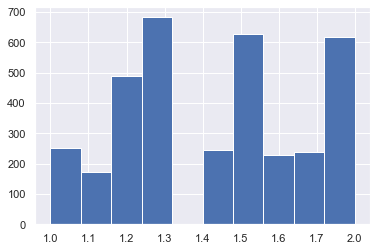

In [96]:
bin_sizes, _, _ = plt.hist(df['SinceVersion'].sort_values(ascending=True))